# Aperiodic Signals

Words, words, words.

In [1]:
%matplotlib inline

import warnings
import collections

import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw
from neurodsp.plts import plot_power_spectra
from neurodsp.spectral import compute_spectrum
from neurodsp.utils import set_random_seed

In [2]:
# Import local code
from vcode.utils.data import yield_sig as yield_sig2
from vcode.plts.utils import clear_output, animate_plot

## Setup

Words, words, words.

### Settings

In [3]:
import seaborn as sns
sns.set_context('talk')

In [4]:
# Set random seed
set_random_seed(505)

### Plot Functions

In [5]:
def plot_ts(data_dict, ax=None):
    """Plot timeseries."""
    
    if not ax:
        _, ax = plt.subplots()
    
    for label, data in data_dict.items():
        ax.plot(data, label=label)

    ax.set(xticks=[], yticks=[]);        
    plt.grid(True)
    
    
def plot_hist(data_dict, ax=None):
    """Plot histogram."""
    
    if not ax:
        _, ax = plt.subplots()
    
    for label, data in data_dict.items():
        ax.hist(data, label=label, alpha=0.5)

    ax.set(xticks=[], yticks=[]);
    plt.grid(True)
    
    
def plot_spectrum(data_dict, ax=None):
    """Plot spectrum."""
    
    if not ax:
        _, ax = plt.subplots()
    
    for label, data in data_dict.items():  
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            freqs, powers = compute_spectrum(np.array(data), fs=fs)
            ax.plot(np.log(freqs), np.log(powers))
            #ax.loglog(freqs, powers)
            #plot_power_spectra(freqs, powers, ax=ax)
            ax.set(xticks=[], yticks=[]);

### Build Functions

In [6]:
def yield_sig(sig, step=1):
    """Helper function for yielder segments of a signal."""
    
    for chunk in sig[::step]:
        yield chunk

In [7]:
def make_axes():
    """Make axes for combined plot.
    
    Notes:
    Placement definitions: Left, Bottom, Width, Height
    """
    
    fig = plt.figure()
    ax1 = fig.add_axes([0.0, 0.6, 1.3, 0.5])
    ax2 = fig.add_axes([0.0, 0.0, 0.6, 0.5])
    ax3 = fig.add_axes([0.7, 0.0, 0.6, 0.5]) 
    
    return fig, [ax1, ax2, ax3]

In [15]:
def build_plot(sigs, plot_func, *args, sleep=0.05, n_build=25):
    """A generic builder function for animated plots on signals."""
    
    yielders = [yield_sig(sig) for sig in sigs]
    
    data = collections.defaultdict(list)
    
    for ind in range(n_build):
        
        clear_output(wait=True)
        
        for ind, yielder in enumerate(yielders):
            data[ind].append(next(yielder))
        
        plot_func(data)
        
        animate_plot(plt.gcf(), False, ind, sleep=sleep)

In [16]:
def build_all(sigs, n_build=np.inf, sleep=0.05, save=False):
    """Build all plots together."""
    
    yielders = [yield_sig(sig) for sig in sigs]
    
    data = collections.defaultdict(list)

    for ind in range(n_build):
        
        clear_output(wait=True)

        fig, axes = make_axes()
        
        for ind, yielder in enumerate(yielders):
            data[ind].append(next(yielder))
        
        plot_ts(data, ax=axes[0])
        plot_hist(data, ax=axes[1])
        plot_spectrum(data, ax=axes[2])
        
        animate_plot(fig, save, ind, label='02_ap_sig', sleep=sleep)

## Simulate Data

In [17]:
n_seconds = 10
fs = 100

In [18]:
sig1 = sim_powerlaw(n_seconds, fs, 0)
sig2 = sim_powerlaw(n_seconds, fs, -1)
sig3 = sim_powerlaw(n_seconds, fs, -2)

In [19]:
# yielder1 = yield_sig(sig1)
# yielder2 = yield_sig(sig2)
# yielder3 = yield_sig(sig3)

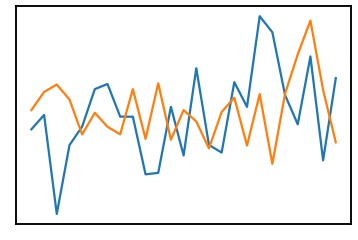

In [20]:
build_plot([sig1, sig2], plot_ts)

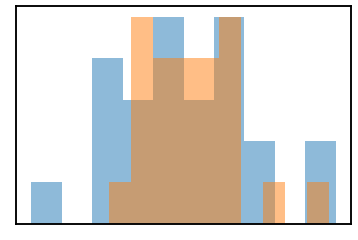

In [21]:
build_plot([sig1, sig2], plot_hist)

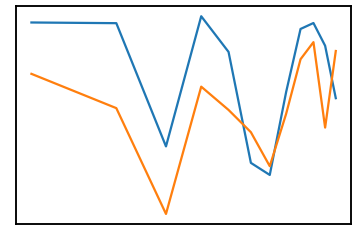

In [22]:
build_plot([sig1, sig2], plot_spectrum, n_build=25)

### Create visualizer with all panels

In [23]:
#build_all([sig2], n_build=250, sleep=0.01)

In [24]:
#build_all([sig2, sig3], n_build=250, sleep=0.01)

## EXTRA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw
from neurodsp.plts import plot_power_spectra
from neurodsp.spectral import compute_spectrum

from vcode.plts.timeseries import plot_timeseries

In [ ]:
# Settings
n_seconds = 1
fs = 1000
exp = -1

In [ ]:
sig = sim_powerlaw(n_seconds, fs, exp)

In [ ]:
def sig_combiner(n_per_sig, fs, exps):
    
    sigs = []
    for exp in exps:
        sigs.append(sim_powerlaw(n_per_sig, fs, exp))
    sig = np.concatenate(sigs)
    
    return sig

def yield_sig(sig, step=1):
    for el in sig[::step]:
        yield el
        
def live_plot_s(arr):
    clear_output(wait=True)
    plt.figure(figsize=(7,5))
    #plt.plot(arr)
    plot_timeseries(np.array(data), ax=plt.gca())
    plt.show();

In [ ]:
ap_sig = sig_combiner(0.2, 500, [0, -2])
sig_yielder = yield_sig(ap_sig)

In [ ]:
plt.plot(ap_sig)

In [ ]:
data = []
for ind in range(500):
    data.append(next(sig_yielder))
    live_plot_s(data)